VIRA  178 20
RITY  531 43
SUMA  709 63


<AxesSubplot:>

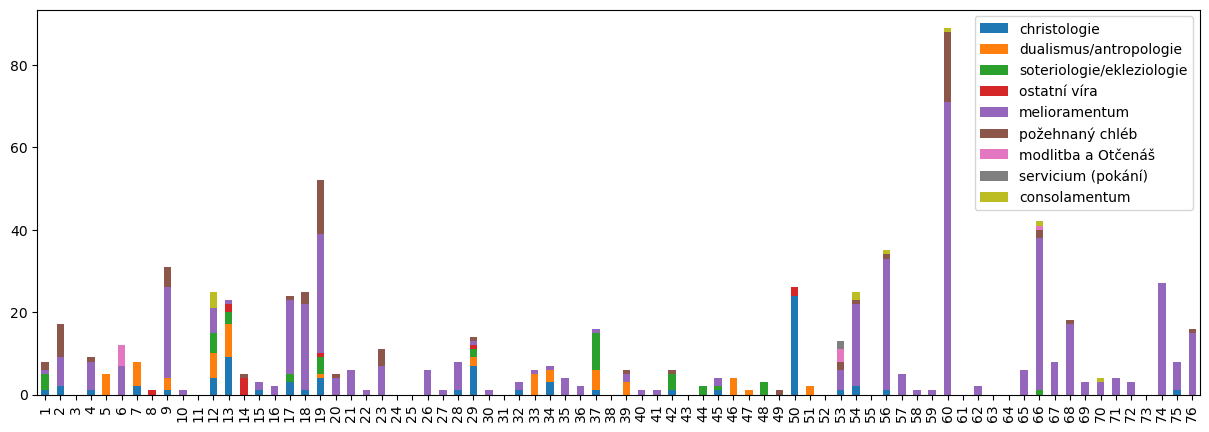

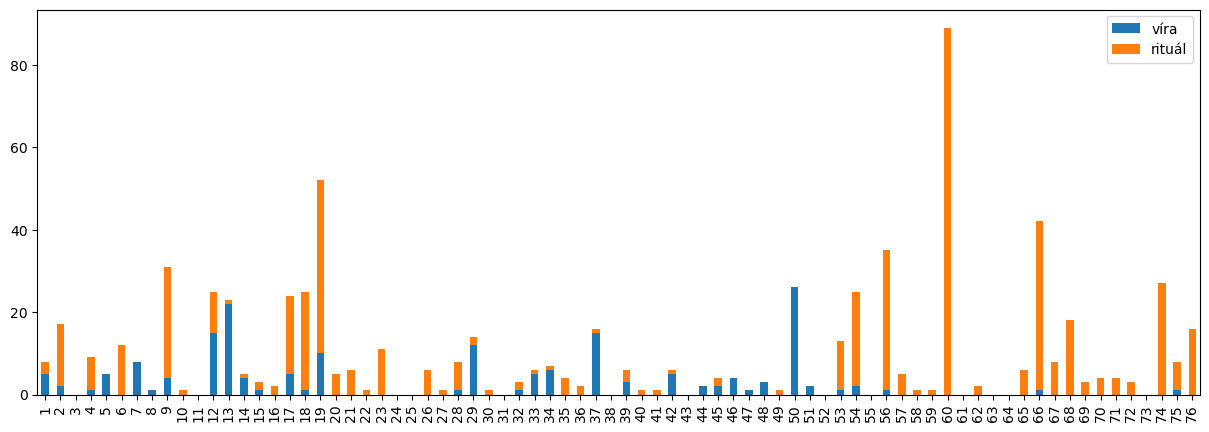

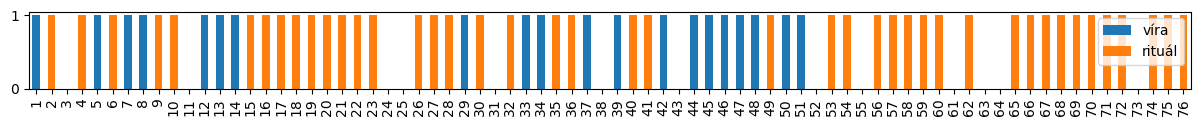

In [22]:
import os.path as pth
import pandas as pd

index = []
counts = [[], [], [], [], [], [], [], [], [], [], [], [], []]

pers_max = 76
total_faith = 0
total_rites = 0
one_faith = 0
one_rites = 0

for pers in range(1, pers_max + 1):
    index.append(pers)
    counts[0].append(0)
    counts[1].append(0)
    counts[2].append(0)
    counts[3].append(0)    
    counts[4].append(0)
    counts[5].append(0)
    counts[6].append(0)    
    counts[7].append(0)
    counts[8].append(0)
    counts[9].append(0)    
    counts[10].append(0)
    counts[11].append(0)
    counts[12].append(0)

dfx = pd.read_excel(r'rituals.xlsx', 'Rituál')
rites = dfx.values.tolist()

dfx = pd.read_excel(r'rituals.xlsx', 'Víra')
faith = dfx.values.tolist()

for r in range(0, len(rites)):
    counts[0][r] = 0
    counts[1][r] = 0 
    counts[2][r] = 0
    counts[3][r] = 0
    counts[4][r] = 0
    counts[5][r] = 0
    counts[6][r] = 0
    counts[7][r] = 0
    counts[8][r] = 0
    counts[9][r] = 0
    counts[10][r] = 0
    counts[11][r] = 0
    counts[12][r] = 0

for r in range(0, len(rites)):    
    counts[1][r] += faith[r][0]
    counts[0][r] += faith[r][1]
    counts[2][r] += faith[r][2]
    counts[3][r] += faith[r][3]
    counts[4][r] += rites[r][0]
    counts[5][r] += rites[r][1]
    counts[6][r] += rites[r][2]
    counts[7][r] += rites[r][3]
    counts[8][r] += rites[r][4]
    counts[9][r] += faith[r][0] + faith[r][1] + faith[r][2] + faith[r][3]
    counts[10][r] += rites[r][0] + rites[r][1] + rites[r][2] + rites[r][3] + rites[r][4]
    total_faith += counts[9][r]
    total_rites += counts[10][r]
    if counts[9][r] >= counts[10][r] and counts[9][r] != 0:
       counts[11][r] = 1
       one_faith += 1
    if counts[9][r] < counts[10][r]:
       counts[12][r] = 1
       one_rites += 1    

print ("VIRA ", total_faith, one_faith)
print ("RITY ", total_rites, one_rites)
print ("SUMA ", total_faith + total_rites, one_faith + one_rites)

df = pd.DataFrame({'christologie': counts[0], #CHRIS
                   'dualismus/antropologie': counts[1], #DUAL
                   'soteriologie/ekleziologie': counts[2], #SOTER
                   'ostatní víra': counts[3],
                   'melioramentum': counts[4],
                   'požehnaný chléb': counts[5],
                   'modlitba a Otčenáš': counts[6],
                   'servicium (pokání)': counts[7],
                   'consolamentum': counts[8],
                  }, index = index)
df.plot.bar(stacked=True, figsize=(15, 5))

df2 = pd.DataFrame({'víra': counts[9],
                   'rituál': counts[10],
                  }, index = index)
df2.plot.bar(stacked=True, figsize=(15, 5))

df3 = pd.DataFrame({'víra': counts[11],
                   'rituál': counts[12],
                  }, index = index)
df3.plot.bar(stacked=True, figsize=(15, 1))


,christologie,dualismus/antropologie,soteriologie/ekleziologie,ostatní víra
count,76.000000,76.000000,76.000000,76.000000
mean,0.171053,0.263158,0.197368,0.118421
std,0.526325,0.660675,0.462450,0.398902
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,2.000000,2.000000


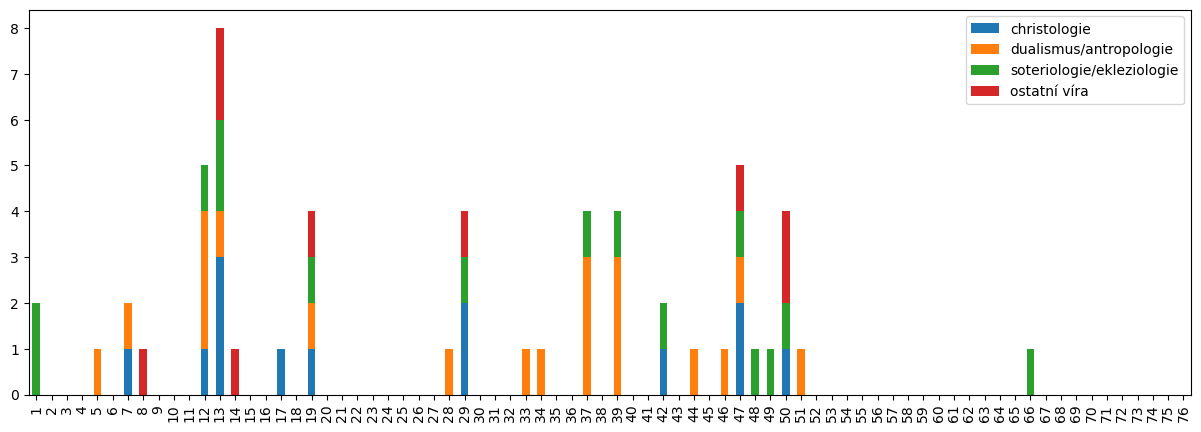

In [71]:
import os.path as pth
import pandas as pd
import re

index = []
counts = [[], [], [], [], [], [], [], [], [], [], []]

pers_max = 76

for pers in range(1, pers_max + 1):
    index.append(pers)
    counts[0].append(0)
    counts[1].append(0)
    counts[2].append(0)
    counts[3].append(0)
    
#SOTER
counts[2][ 1 -1] = 2
counts[2][12 -1] = 1
counts[2][13 -1] = 2
counts[2][19 -1] = 1
counts[2][19 -1] = 1
counts[2][29 -1] = 1
counts[2][37 -1] = 1
counts[2][39 -1] = 1
counts[2][42 -1] = 1
counts[2][47 -1] = 1
counts[2][48 -1] = 1
counts[2][49 -1] = 1
counts[2][50 -1] = 1
counts[2][66 -1] = 1

#DUAL
counts[1][ 5 -1] = 1
counts[1][ 7 -1] = 1
counts[1][12 -1] = 3
counts[1][13 -1] = 1
counts[1][19 -1] = 1
counts[1][28 -1] = 1
counts[1][33 -1] = 1
counts[1][34 -1] = 1
counts[1][37 -1] = 3
counts[1][39 -1] = 3
counts[1][44 -1] = 1
counts[1][46 -1] = 1
counts[1][47 -1] = 1
counts[1][51 -1] = 1

#CHRIS
counts[0][ 7 -1] = 1
counts[0][12 -1] = 1
counts[0][13 -1] = 3
counts[0][17 -1] = 1
counts[0][19 -1] = 1
counts[0][29 -1] = 2
counts[0][42 -1] = 1
counts[0][47 -1] = 2
counts[0][50 -1] = 1

#OTHER
counts[3][ 8 -1] = 1
counts[3][13 -1] = 2
counts[3][14 -1] = 1
counts[3][19 -1] = 1
counts[3][29 -1] = 1
counts[3][47 -1] = 1
counts[3][50 -1] = 2
                        
df = pd.DataFrame({'christologie': counts[0], #CHRIS
                   'dualismus/antropologie': counts[1], #DUAL
                   'soteriologie/ekleziologie': counts[2], #SOTER
                   'ostatní víra': counts[3],
                  }, index = index)
df.plot.bar(stacked=True, figsize=(15, 5))
df.describe()